In [1]:
import sys
print(sys.version)
print(spark.version)

3.8.15 | packaged by conda-forge | (default, Nov 22 2022, 08:46:39) 
[GCC 10.4.0]
3.1.3


In [2]:
import os
import time
import subprocess
import seaborn as sns
from pyspark.sql.functions import *
from pyspark.sql.types import *
import matplotlib.pyplot as plt
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [3]:
warnings.filterwarnings(action='ignore')
spark = SparkSession.builder.getOrCreate()

##Add "eagerEval.enabled" to beautify the way Spark DF is displayed
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

## To use legacy casting notation for date
spark.conf.set("spark.sql.legacy.timeParserPolicy","LEGACY")

In [4]:
filtered=spark.read.parquet('gs://msca-bdp-students-bucket/shared_data/sirivanth/filtered_data')

23/03/01 09:21:04 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [5]:
filtered.count()

51740360

In [6]:
filtered.columns

['coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'extended_tweet',
 'favorite_count',
 'favorited',
 'filter_level',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'quote_count',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'quoted_text',
 'reply_count',
 'retweet_count',
 'retweeted',
 'retweeted_from',
 'retweeted_status',
 'source',
 'text',
 'timestamp_ms',
 'truncated',
 'tweet_text',
 'user',
 'withheld_in_countries',
 'stripped']

In [7]:
filtered.describe()

summary,created_at,favorite_count,filter_level,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,lang,quote_count,quoted_status_id,quoted_status_id_str,quoted_text,reply_count,retweet_count,retweeted,retweeted_from,source,text,timestamp_ms,tweet_text,stripped
count,51740360,51740360,51740360,51740360,51740360,7656107,7365732,7365732,7656107,7656107,51740360,51740360,4037691,4037691,4031220,51740360,51740360,51740360,36659672,51740360,51740360,51740360,51740360,51740360
mean,null,0.0,null,1.567132532800617...,1.567132532800617...,NaN,1.566193754316620...,1.566193754316620...,6.382328113495472...,6.382328113495472...,null,0.0,1.561388995718928...,1.561388995718928...,2.259674389065254...,0.0,0.0,null,NaN,null,null,1.662468486390763E12,null,null
stddev,null,0.0,null,3.189150685246150...,3.189150685246150...,NaN,3.888885660208292...,3.888885660208292...,6.535152959261162...,6.535152959261162...,null,0.0,7.218554102694902...,7.218554102694902...,1.152181090869656...,0.0,0.0,null,NaN,null,null,7.603527749160974E9,null,null
min,Fri Apr 08 00:00:...,0,low,1511197336059342854,1511197336059342854,0,3503083,1000029495213084673,12,1000002795213385734,en,0,20,1000025788522094592,,0,0,,,"<a href=""HTTP://b...",! Check out this...,1649132496262,! check out this...,high schoo...
max,Wed Sep 28 23:59:...,0,low,1623308317828284418,1623308317828284418,zzzzzzzzzzzzay,1623308103516098564,999953412291735552,1623253944557355008,999999555373555712,en,0,1623304161294012418,999816575799713792,󠇰 󠇰 󠇰 󠇰 ❝. ....,0,0,RT,🥴 😩 #admin,"<a href=""https://...",󠇰 󠇰 󠇰 󠇰 Prof...,1675861837237,󠇰 󠇰 󠇰 󠇰 prof...,󠇰 󠇰 󠇰 󠇰 prof...


In [8]:
filtered.select([count(when(isnull(c), c)).alias(c) for c in filtered.columns]).toPandas().transpose()

,0
coordinates,51656607
created_at,0
display_text_range,42167436
entities,0
extended_entities,47250123
extended_tweet,40367755
favorite_count,0
favorited,0
filter_level,0
geo,51656607


In [9]:
filtered.select('retweeted').groupby('retweeted').count().show()

+---------+--------+
|retweeted|   count|
+---------+--------+
|         |18821350|
|       RT|32919010|
+---------+--------+



In [10]:
#filtered.printSchema()

In [11]:
#filtered.createOrReplaceTempView("filtered")

In [12]:
filtered.createOrReplaceTempView("filtered")

In [13]:
query = '''select created_at,
tweet_text,
in_reply_to_status_id as replied,
coordinates,
place as location,
is_quote_status as is_quote,
retweeted as is_retweeted,
retweeted_status.id as Retweeted_id,
retweeted_status.user.screen_name as Retweeted_user,
user.screen_name as Profile,
user.location as user_location,
user.verified as user_verified,
user.followers_count as followers,
user.statuses_count as total_tweets,
entities.hashtags.text as hashtags 
from filtered'''
dropped_col = spark.sql(query)

In [14]:
ran = dropped_col.sample(0.02).toPandas()

In [15]:
ran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034879 entries, 0 to 1034878
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   created_at      1034879 non-null  object 
 1   tweet_text      1034879 non-null  object 
 2   replied         147488 non-null   float64
 3   coordinates     1617 non-null     object 
 4   location        9752 non-null     object 
 5   is_quote        1034879 non-null  bool   
 6   is_retweeted    1034879 non-null  object 
 7   Retweeted_id    659167 non-null   float64
 8   Retweeted_user  659167 non-null   object 
 9   Profile         1034879 non-null  object 
 10  user_location   635672 non-null   object 
 11  user_verified   1034879 non-null  bool   
 12  followers       1034879 non-null  int64  
 13  total_tweets    1034879 non-null  int64  
 14  hashtags        1034879 non-null  object 
dtypes: bool(2), float64(2), int64(2), object(9)
memory usage: 104.6+ MB


<AxesSubplot:>

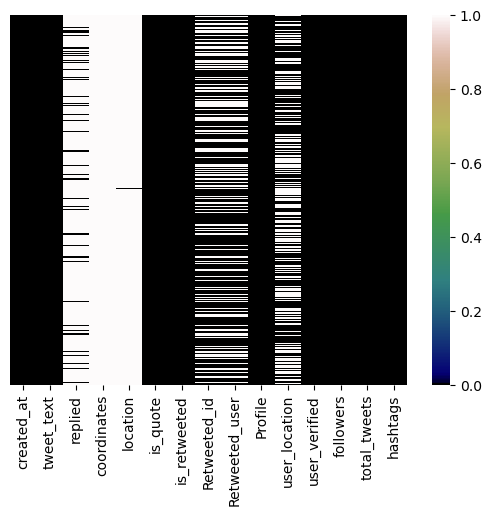

In [16]:
sns.heatmap(ran.isnull(), cbar=True, yticklabels=False, cmap='gist_earth')

In [17]:
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()/len(data_frame)
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='darkgrid')
    sns.scatterplot(x='Name', y='count', data=missing_values)
    plt.xticks(rotation=90)
    plt.xlabel('Variable used')
    plt.ylabel('Range')
    plt.title('Number of missing values')
    plt.show()

In [18]:
return_missing_values(ran)

Retweeted_id      0.363049
Retweeted_user    0.363049
user_location     0.385752
replied           0.857483
location          0.990577
coordinates       0.998437
dtype: float64

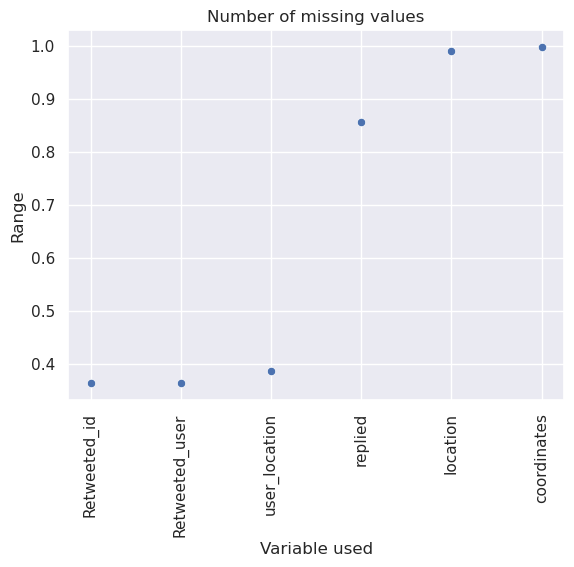

In [19]:
plot_missing_values(ran)

In [20]:
import numpy as np

In [21]:
ran['Type'] = np.where(ran['replied'].notnull(),'Reply', np.where(ran['Retweeted_user'].notnull(), 'Retweet', 'Tweet'))

Text(0, 0.5, 'Count')

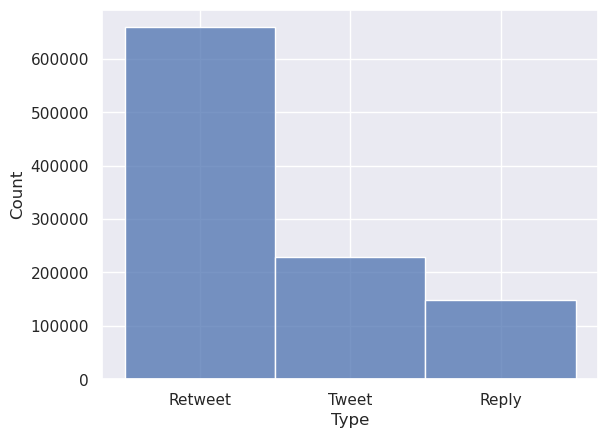

In [22]:
sns.histplot(x='Type', data=ran)
plt.xlabel('Type')
plt.ylabel('Count')

In [23]:
samp_1 = ran[['followers','Profile']].groupby(['Profile'], as_index=False).sum() 
samp_2 = samp_1.sort_values(by=['followers'],ascending=False).head(10)

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib as plt
import os
import time 
import subprocess
import sys

In [14]:
print(sys.argv)

['/Users/sirivanth/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py', '-f', '/Users/sirivanth/Library/Jupyter/runtime/kernel-c374008b-0fe3-472b-b9aa-824f1b389ed3.json']


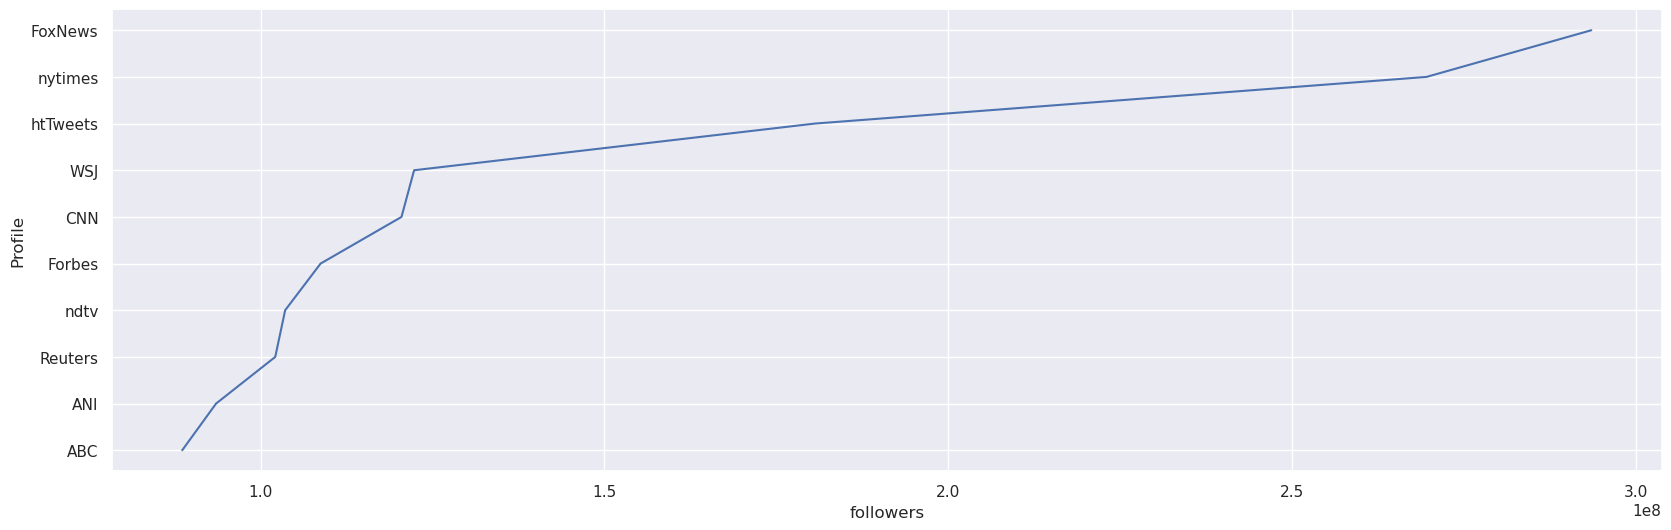

In [24]:
plt.figure(figsize=(20,6)) 
sns.lineplot(x='followers',y='Profile',data=samp_2) 
plt.show()

In [25]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:10], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Education'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

In [26]:
import pandas as pd

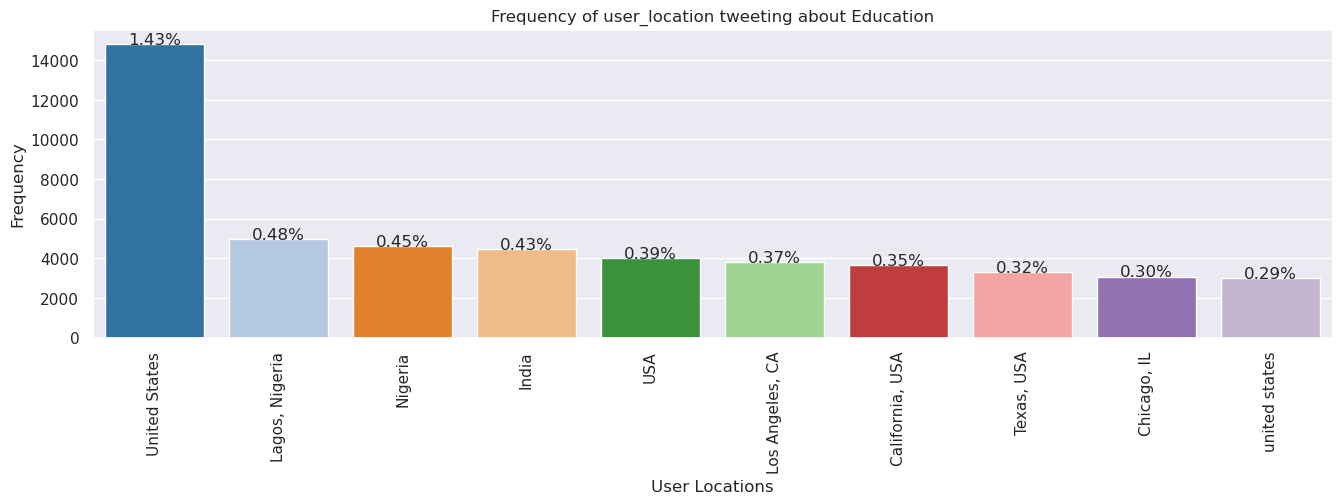

In [27]:
plot_frequency_charts(ran, 'user_location', 'User Locations', 'tab20')

In [ ]:
user_locations.merge(Unites States, USA, Los Angeles, CA, California, USA, Texas, USA, Chicago, IL, united states)
frequency = 20
tab_20 = "charts"
bar_graph = ("0.8")

In [ ]:
qwery = '''
Select Retweeted as Retweet
User Location as Location
Retweeted_Status_ID as Status
User_Preference_State as State
User_is_Verified as Verified
User_Screen_name as profile
User_Follower_Count as Followers
'''

In [1]:
import datetime
import pytz

datetime.datetime.now(pytz.timezone('US/Central')).strftime("%a, %d %B %Y %H:%M:%S")

'Sun, 01 October 2023 17:26:26'